# NGC6334

In [131]:
%pylab inline
from pywavan import powspec, fan_trans
from astropy.io import fits
import aplpy

Populating the interactive namespace from numpy and matplotlib


In [94]:
HDU = fits.open('NGC6334-SiO-ACA-with-IRAM-with-12m_Velocity.PeakIntensity.fits')
data = HDU[0].data

#Cut the map
im = data[0,0,332:1902,564:1577]
#Replace nan with zeros
im[im != im] = 0.
meanV = np.mean(im[im != 0.])
#Resolution in arcmin
reso = HDU[0].header['CDELT2'] * 60.
del data, HDU

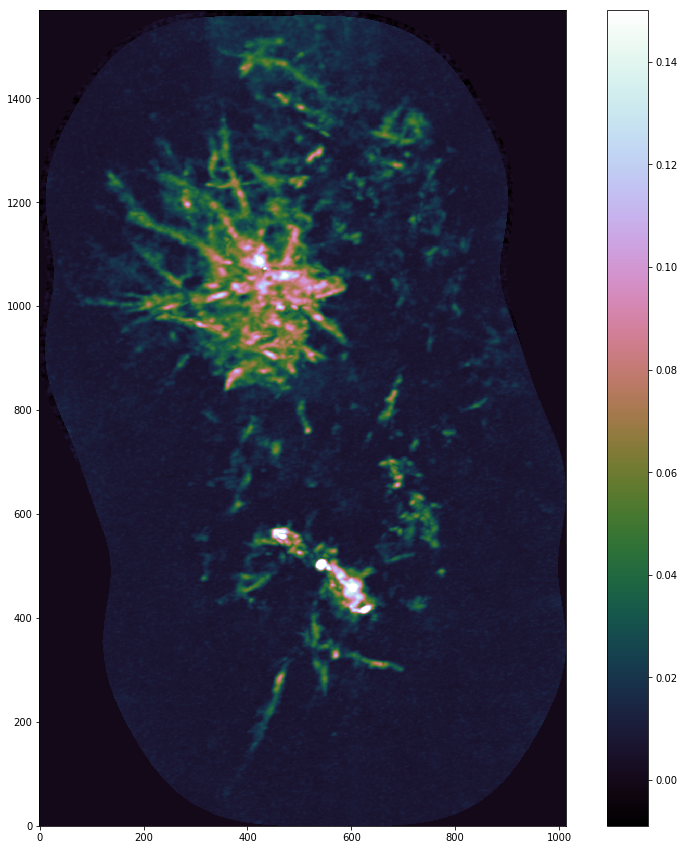

In [31]:
figure(figsize=(15,15))
imshow(im,vmin=-0.0089,vmax=0.15,cmap='cubehelix',origin='lower')
colorbar()

### Power spectrum analysis

In [46]:
wt, S11a, wav_k, S1a, q = fan_trans(im, reso=reso, q=0, qdyn=False, arrdim=np.array((1570,1570)))
tab_k, spec_k = powspec(im,reso=reso)

1570 1570


"arrdim" add a padding of zero value pixels around the map. Wavelets seem to respond better to square images. The padding explains the same difference of power at large scales compared to the Fourier power spectrum.

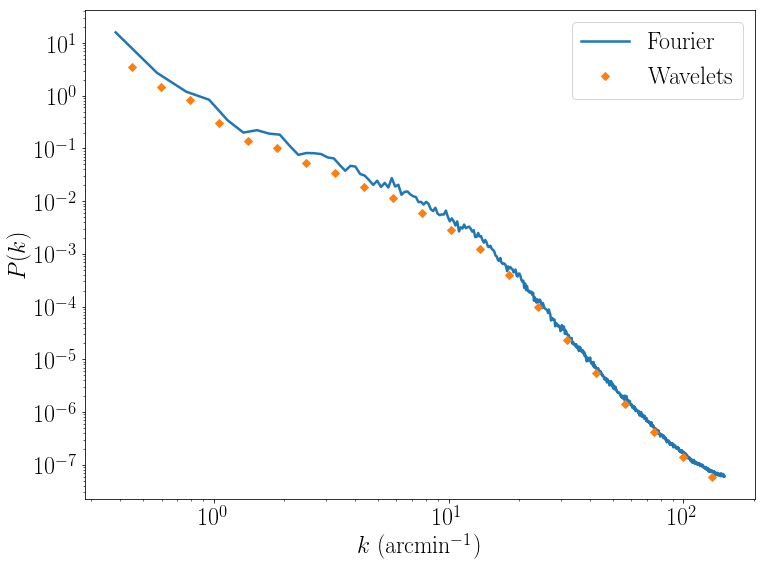

In [162]:
plt.rc('font', **{'family': 'serif', 'size': 24})
plt.rc('lines', linewidth = 2.5)
plt.rc('text', usetex=True)

plt.figure(figsize(12,9))
plt.plot(tab_k[1:], spec_k[1:],label='Fourier')
plt.plot(wav_k[3:-1], S1a[3:-1],'D',label='Wavelets')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ (arcmin$^{-1}$)',fontsize=fontsize)
plt.ylabel(r'$P(k)$',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)

### Wavelet segmentation

In [111]:
#Wavelet power spectrum
q=[]
q=[2.9]*wav_k.size
#q=[2.0]*4+[1.6]*17
wtS, S11aS, wav_k, S1aS, qS = fan_trans(im, reso=reso, q=q, qdyn=True, angular=False, skewl=0.4, arrdim=np.array((1570,1570)))

1570 1570


### Plot images

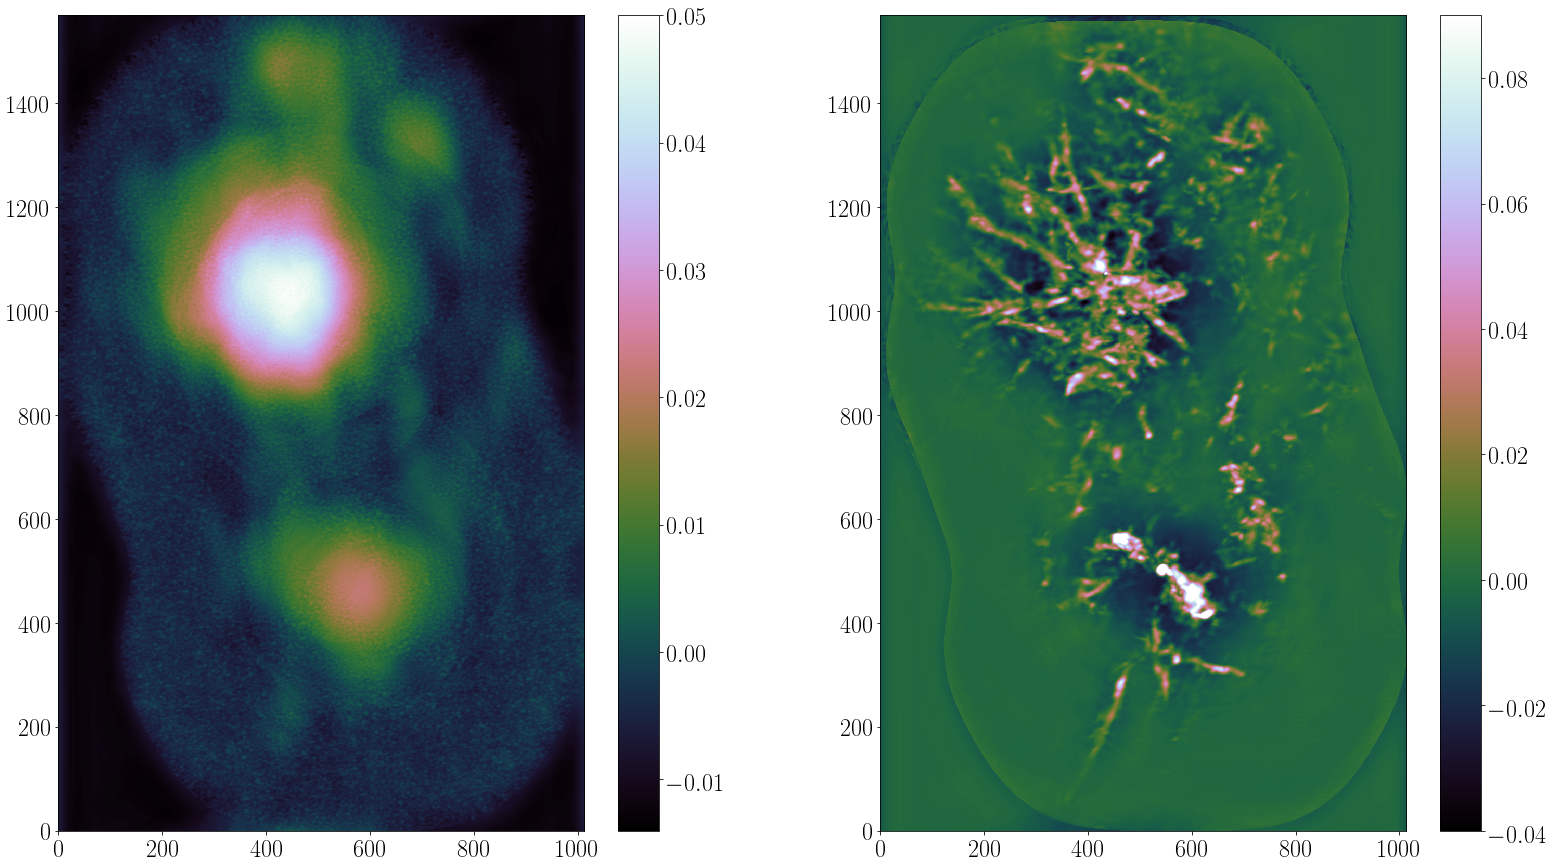

In [147]:
M = wav_k.size
coherent = np.sum(wtS[M:2*M,:,:].real,axis=0)
Gaussian = np.sum(wtS[2*M:3*M,:,:].real,axis=0)
figure(figsize=(27,15))
subplot(1,2,1)
imshow(Gaussian,vmin=np.min(Gaussian),vmax=np.max(Gaussian),cmap='cubehelix',origin='lower')
colorbar()
subplot(1,2,2)
imshow(coherent,vmin=-0.04,vmax=0.09,cmap='cubehelix',origin='lower')
colorbar()

In [139]:
fits.writeto('/Users/robitaij/postdoc/NGC6334/NGC6334_Gaussian.fits',Gaussian,overwrite=True)
fits.writeto('/Users/robitaij/postdoc/NGC6334/NGC6334_coherent.fits',coherent,overwrite=True)
fits.writeto('/Users/robitaij/postdoc/NGC6334/NGC6334_orig_cut.fits',im,overwrite=True)
fits.writeto('/Users/robitaij/postdoc/NGC6334/NGC6334_cube.fits',wtS.real,overwrite=True)

### Plot $q$ parameter

[2.9, 2.9, 2.9, 2.9, 2.9, 1.899999999999999, 1.5999999999999988, 1.9999999999999991, 1.899999999999999, 1.899999999999999, 1.9999999999999991, 1.9999999999999991, 1.899999999999999, 1.9999999999999991, 1.9999999999999991, 1.9999999999999991, 2.099999999999999, 2.099999999999999, 2.1999999999999993, 2.2999999999999994, 2.1999999999999993, 2.1999999999999993, 2.099999999999999, 1.899999999999999, 1.899999999999999]


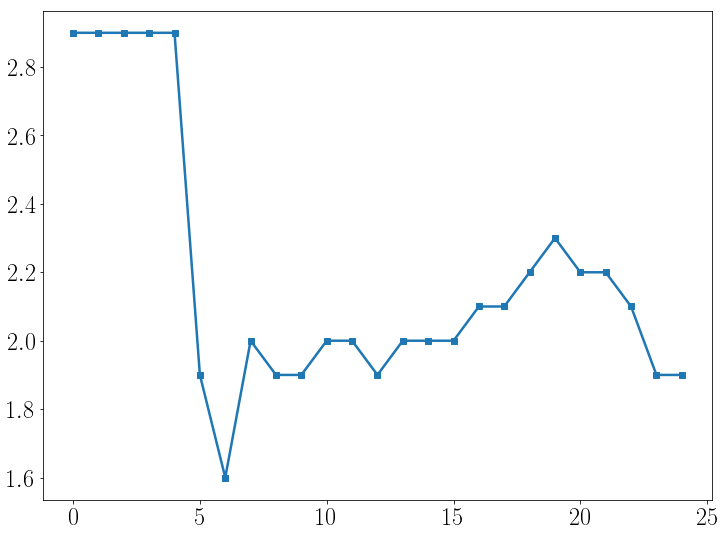

In [81]:
print(qS)
plt.figure(figsize(12,9))
plt.plot(qS,marker='s')

According to the set of "optimized" $q$s, I tried to rerun **fan_trans** with a gradient of $q$ at large scales.
The first results were not too bad and I think succeeded to isolate a good part of the Gaussian signal. However, because of the lack statistics (independant point) at large scales, the algorithm did not succeed to extract non-Gaussianities. So by starting with a lower $q$, I force the detection of non-Gaussianities at larger scales.

In [127]:
#Wavelet power spectrum
q=[]
#q=[2.9]*wav_k.size
q=[1.0,1.1,1.2,1.3,1.4,1.5]+[2.4]*19
wtS2, S11aS2, wav_k, S1aS2, qS2 = fan_trans(im, reso=reso, q=q, qdyn=True, angular=False, skewl=0.4, arrdim=np.array((1570,1570)))

1570 1570


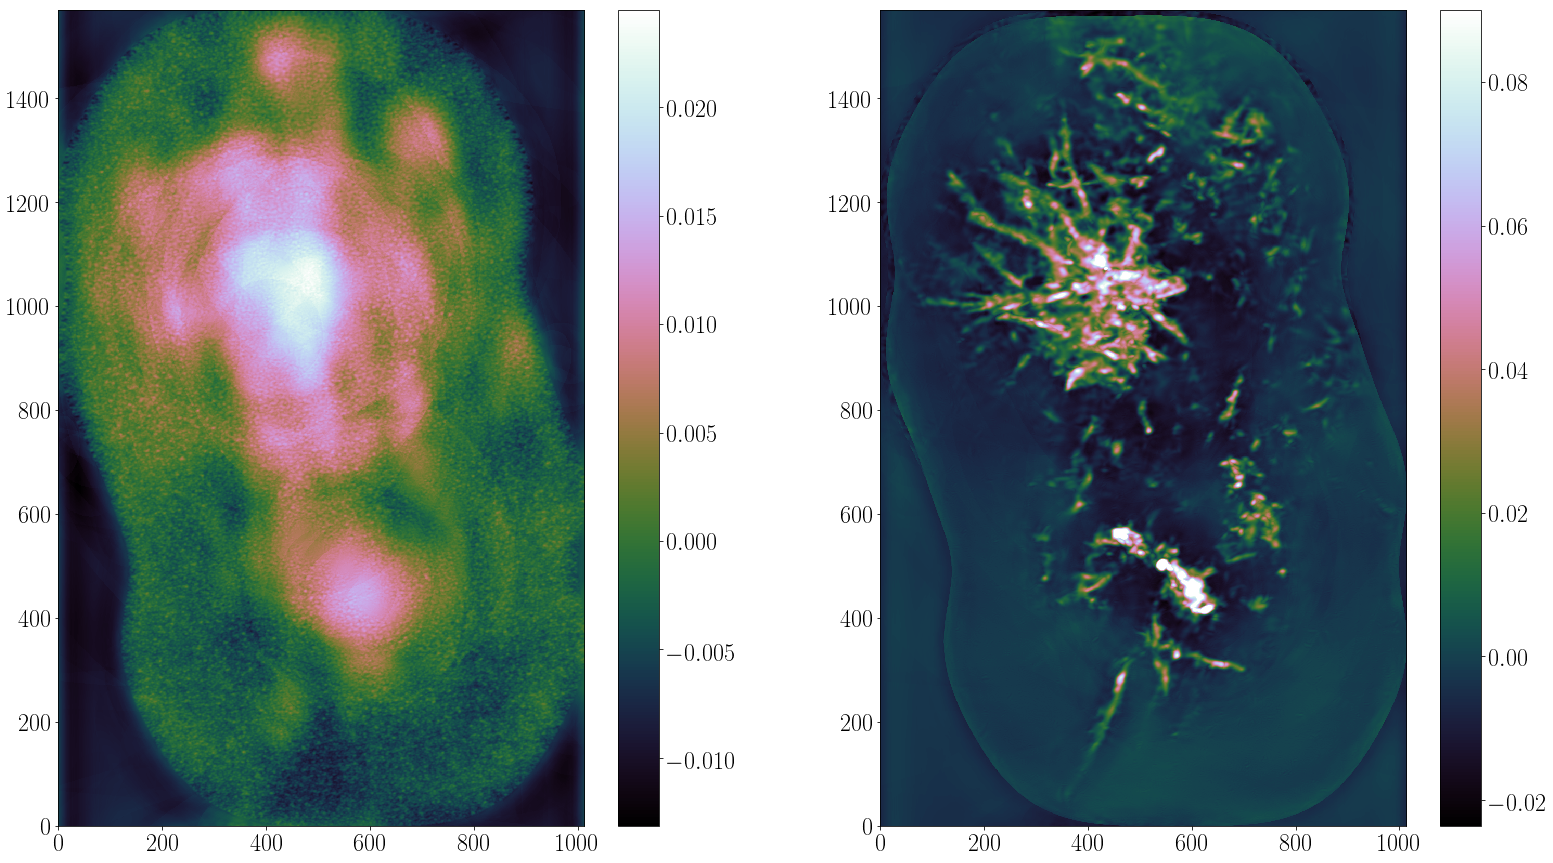

In [151]:
M = wav_k.size
coherent2 = np.sum(wtS2[M:2*M,:,:].real,axis=0)
Gaussian2 = np.sum(wtS2[2*M:3*M,:,:].real,axis=0)

figure(figsize=(27,15))
subplot(1,2,1)
imshow(Gaussian2,vmin=np.min(Gaussian2),vmax=np.max(Gaussian2),cmap='cubehelix',origin='lower')
colorbar()
subplot(1,2,2)
imshow(coherent2,vmin=np.min(coherent2),vmax=0.09,cmap='cubehelix',origin='lower')
colorbar()

The strategy seems to successfully remove the large-scale dominating fluctuations in the Gaussian part.

In [146]:
fits.writeto('/Users/robitaij/postdoc/NGC6334/NGC6334_Gaussian2.fits',Gaussian2,overwrite=True)
fits.writeto('/Users/robitaij/postdoc/NGC6334/NGC6334_coherent2.fits',coherent2,overwrite=True)
fits.writeto('/Users/robitaij/postdoc/NGC6334/NGC6334_cube2.fits',wtS2.real,overwrite=True)

[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.5999999999999992, 1.9999999999999996, 1.8999999999999995, 1.8999999999999995, 1.9999999999999996, 1.9999999999999996, 1.8999999999999995, 1.9999999999999996, 1.9999999999999996, 1.9999999999999996, 2.0999999999999996, 2.0999999999999996, 2.1999999999999997, 2.3, 2.1999999999999997, 2.1999999999999997, 2.0999999999999996, 1.8999999999999995, 1.8999999999999995]


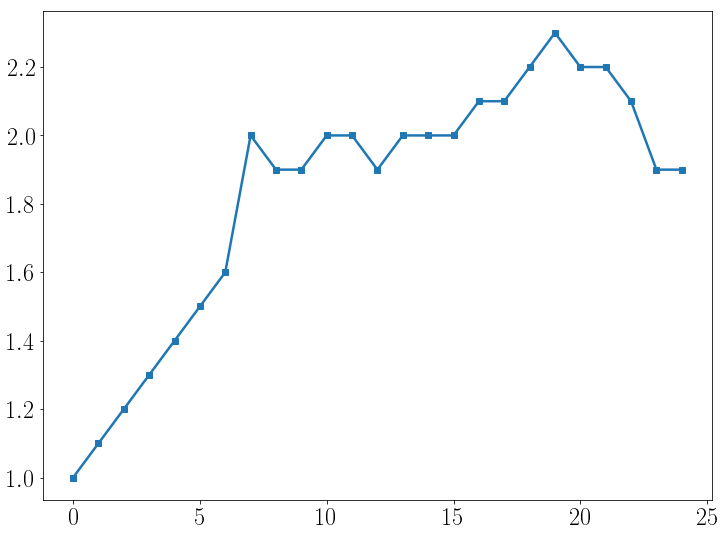

In [141]:
print(qS2)
plt.figure(figsize(12,9))
plt.plot(qS2,marker='s')

It is possible to remove actefacts due to the large scale segmentation by using the keyword 'smooth'. However, it is not really a smooth. The purpose of this keyword is to remove the discontinuities coming from the segmentation.

In [152]:
#Wavelet power spectrum
q=[]
#q=[2.9]*wav_k.size
q=[1.0,1.1,1.2,1.3,1.4,1.5]+[2.4]*19
wtS3, S11aS3, wav_k, S1aS3, qS3 = fan_trans(im, reso=reso, q=q, qdyn=True, angular=False, skewl=0.4, arrdim=np.array((1570,1570)), smooth=True)

1570 1570


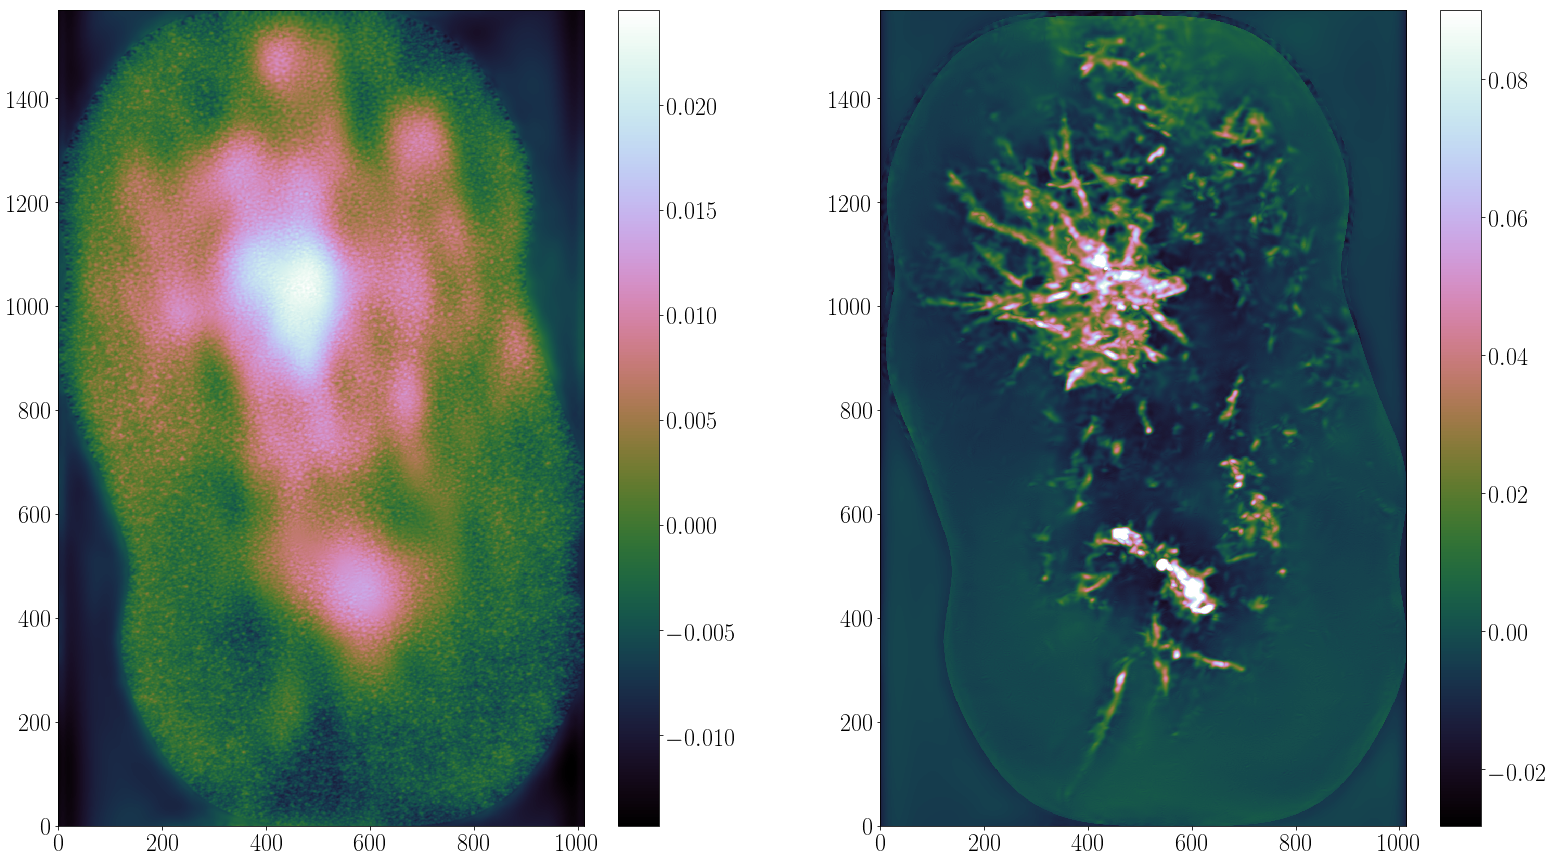

In [154]:
M = wav_k.size
coherent3 = np.sum(wtS3[M:2*M,:,:].real,axis=0)
Gaussian3 = np.sum(wtS3[2*M:3*M,:,:].real,axis=0)

figure(figsize=(27,15))
subplot(1,2,1)
imshow(Gaussian3,vmin=np.min(Gaussian3),vmax=np.max(Gaussian3),cmap='cubehelix',origin='lower')
colorbar()
subplot(1,2,2)
imshow(coherent3,vmin=np.min(coherent3),vmax=0.09,cmap='cubehelix',origin='lower')
colorbar()

### Segmented power spectra

Further analysis can be done by looking at the segmented power spectra.

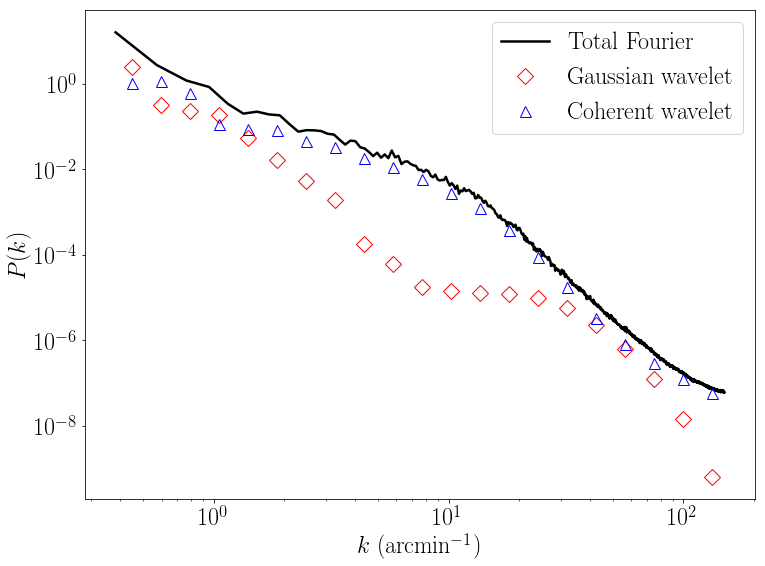

In [163]:
plt.figure(figsize(12,9))
plt.plot(tab_k[1:], spec_k[1:], color='black',label=r'Total Fourier')
plt.plot(wav_k[3:-1], S1aS2[2,3:-1],'D', markersize = 11, markerfacecolor='none', markeredgecolor='red', label='Gaussian wavelet')
plt.plot(wav_k[3:-1], S1aS2[1,3:-1],'^', markersize = 11, markerfacecolor='none', markeredgecolor='blue', label='Coherent wavelet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ (arcmin$^{-1}$)',fontsize=fontsize)
plt.ylabel(r'$P(k)$',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)

The Gaussian wavelet power spectrum becomes flat for $k \gtrsim 8$ arcmin$^{-1}$, which means that the smaller scales $k$ are dominated by the noise. However, the coherent compnent still have 'strucutres' below these scales.You can choose to reconstruct the Gaussian part only for scales not dominated by the noise. Consequently, you can also reconstruct a *denoised* map by adding the two components.

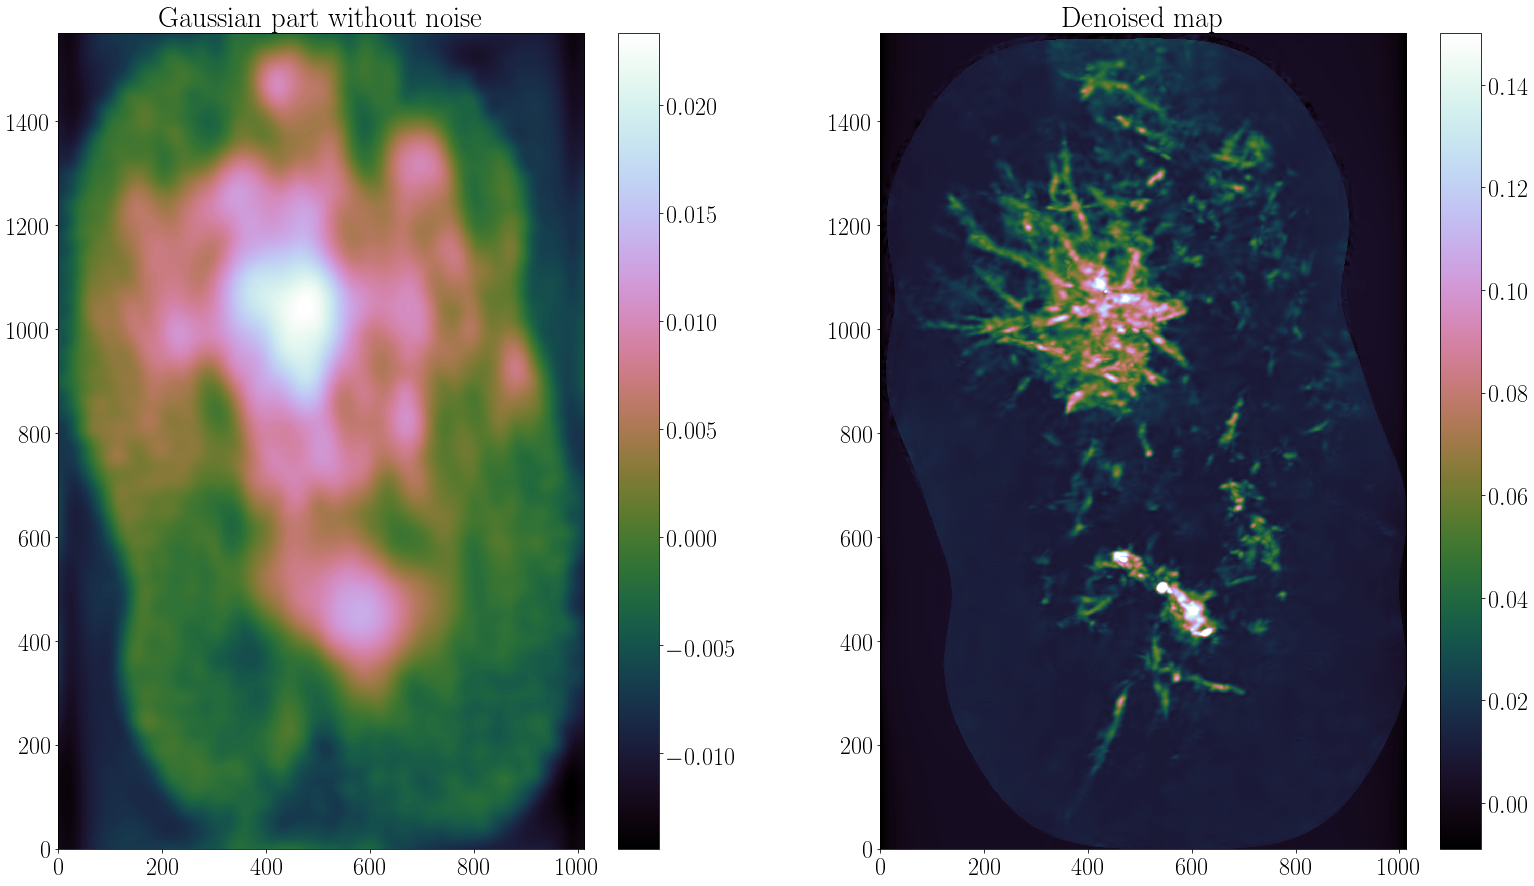

In [168]:
M = wav_k.size
coherent3 = np.sum(wtS3[M:2*M,:,:].real,axis=0)
Gaussian3 = np.sum(wtS3[2*M:2*M+13,:,:].real,axis=0)

figure(figsize=(27,15))
subplot(1,2,1)
imshow(Gaussian3,vmin=np.min(Gaussian3),vmax=np.max(Gaussian3),cmap='cubehelix',origin='lower')
title('Gaussian part without noise')
colorbar()
subplot(1,2,2)
imshow(coherent3+Gaussian3+meanV,vmin=-0.0089,vmax=0.15,cmap='cubehelix',origin='lower')
title('Denoised map')
colorbar()